<div style="background-color:#342184; padding:6px; color:#f3f0ff;">

# Finesse 3 example: Fabry Perot cavity

</div>

In this interactive notebook we use <a href=http://www.gwoptics.org/finesse/>Finesse 3</a> and <a href="https://www.python.org/">Python</a>, executed in <a href="http://jupyter.org/">Jupyter</a> notebooks. This example demonstrates some features of a simple laser interferometer, the two-mirror optical cavity, also known as Fabry-Perot cavity. This notebook continues on from '1_Finesse3_introduction.ipynb'.

You may want to read <a href=https://link.springer.com/article/10.1007/s41114-016-0002-8#Sec32>section 5.1</a> of 'Interferometer Techniques for Gravitational-Wave Detection', and we recommend to open the <a href="https://finesse.ifosim.org/docs/latest/">Finesse 3 documentation</a> in another tab to look up the Finesse syntax. 

In [1]:
# install pypi wheel only on google colab
!env | grep -q 'colab' && pip install finesse || echo 'Not on google colab, assuming finesse already installed'

Not on google colab, assuming finesse already installed


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import finesse
from finesse.analysis.actions import Xaxis
finesse.init_plotting()

As usual we start with a sketch of the optical setup:

<div style="background-color:white; padding:1em; text-align:center;">
<img src="fabry-perot.svg" width="70%" />
</div>

The cavity consists of two mirrors `m1` and `m2` which are $L$ meters apart. On the input side we have a laser and a beamsplitter. The beamsplitter is used to separate the input from the reflected light for detection. There is also a photodiode on transmission to measure the light passing through the cavity. 

We are using a similar model as in the previous notebook and plot the reflected and transmitted light as a function of the microscopic position of one of the mirrors.

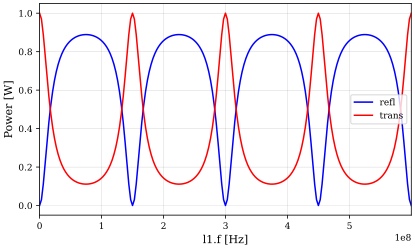

In [3]:
base = finesse.Model()
code="""
# ifo
l l1 P=1
s s2 l1.p1 m1.p1
m m1 R=0.5 T=0.5
s s3 m1.p2 m2.p1 L=1
m m2 R=0.5 T=0.5

# detectors
pd refl m1.p1.o
pd trans m2.p2.o
"""
base.parse(code)
# We expect cavity resonance when f = n*C/L
import finesse.constants as constants
c = constants.C_LIGHT
out1 = base.run(Xaxis('l1.f', 'lin', 0, 4*(c/base.s3.L/2), 200))
out1.plot();


In the following we investigate optical properties of a cavity, namely the *free spectral range*, the *finesse* and the *linewidth*. The finesse of a cavity is the quality factor of teh optical resonantor. The linewidth and quality factor are related as for any resonator. The free speectral range defines the frequency reference of both.

## Find the FSR (free spectral range)

The FSR is defined as the distance (in frequency) between two consequtive resonances. From the plot above we see that one resonance is at f=0, so we need to find teh frequency at which the second peak occurs.

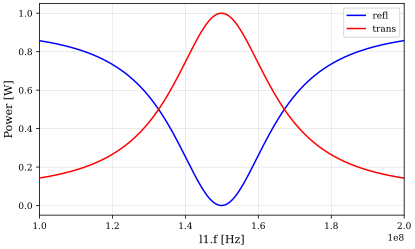

In [4]:
# we re-run the code from above, zooming in on the second peak.
out2 = base.run(Xaxis('l1.f', 'lin', 100e6, 200e6, 200))
out2.plot();

In [ ]:
# The FSR is then easy to find as the maximum of the transmitted light. We can do that with Numpy:


In [ ]:
# Analyitcally the FSR is defined as ...
L = base.s3.L
FSR = ...
print(f"FSR (analytical) = {FSR:.4e}")

## Find the linewidth

For a cavity the linewidth is commonly defined as the *Full Width at Half Maximum* (FWHM) of the resonance peak, which we use here. But other definitions are also used, for example the *Half Width at Half Maximum* (HWHM) and the *pole frequency* $f_p$, which both are equal to half the FWHM. The linewidth tells us how large the frequency band is that is resonant inside the cavity, thus, how well the cavity filters out other frequencies. 

In [ ]:
# Let's zoom in on one of the resonance peaks:

out3 = base.run(Xaxis('l1.f', 'lin', 0, 80e6, 200))
out3.plot();

In [ ]:
# We find the data point at which the tramsmitted light has dropped to 0.5, again using Numpy:


In [ ]:
# We could also do an optimisation, with scipy minimize and writing a function to call Finesse
from scipy.optimize import minimize

def linewidthsearch(f):
    ...
    return ...

op = minimize(...)


The analytic expression for the linewidth is ...



In [ ]:
L = base.s3.L
FSR = c/(2*L)
r1 = np.sqrt(base.m1.R)
r2 = np.sqrt(base.m2.R)
FWHM = ...
print(f"FWHM (analytic) = {FWHM:.4e} Hz")

## Impedance matching

In the model above the reflectivity and transmission of the two mirrors are equal. This is a specail case called 'impedance matched'. In general one can distinguish three regimes. With $T_1$ and $T_2$ the power transmission of mirror 1 and 2 respectively:

* **under-coupled** cavity, $T_1 < T_2$ 
* **impedance matched** cavity, $T_1 = T_2$   
* **over-coupled** cavity, $T_1 > T_2$ 

In the following task plot the reflected, transmitted *and circulating* fields of the cavity and vary $T_1$ while keeping $T_1+T_2=1$ and explain the result. Make sure you keep th emirrors lossless by ensuring $T+R=1$ for each mirror. 

In [ ]:
# we creata a separate version of our model

# By using T, L parameters we can ensure the mirror remians lossless
# And we can link m2.T directly to 1-m1.T

model = finesse.Model()
code2="""
...
"""
model.parse(code2)

out4 = model.run(Xaxis('m1.T', 'lin', 0, 1, 200))
out4.plot();